In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\jahed\anaconda3\envs\mainone\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load datasets
df = pd.read_csv('stroke_data.csv')

In [3]:
# Check the df
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.555602,never smoked,1
1,Female,59.0,0,0,Yes,Private,Rural,76.15,30.242937,Unknown,1
2,Male,78.0,0,1,Yes,Private,Urban,219.84,30.698951,Unknown,1
3,Male,57.0,0,1,No,Govt_job,Urban,217.08,33.808410,Unknown,1
4,Male,58.0,0,0,Yes,Private,Rural,189.84,31.378534,Unknown,1
5,Male,59.0,0,0,Yes,Private,Rural,211.78,33.484568,formerly smoked,1
6,Female,63.0,0,0,Yes,Private,Urban,90.90,30.042545,formerly smoked,1
7,Female,75.0,0,1,No,Self-employed,Urban,109.78,28.318273,Unknown,1
8,Female,76.0,0,0,No,Private,Urban,89.96,28.397893,Unknown,1
9,Male,78.0,1,0,Yes,Private,Urban,75.32,29.139780,formerly smoked,1


In [4]:
# Check for nulls
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
# Create dummy variables
df = pd.get_dummies(df)

In [6]:
# Check the df again
df.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,61.0,0,0,202.21,31.555602,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,59.0,0,0,76.15,30.242937,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0
2,78.0,0,1,219.84,30.698951,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0
3,57.0,0,1,217.08,33.808410,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0
4,58.0,0,0,189.84,31.378534,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
5,59.0,0,0,211.78,33.484568,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0
6,63.0,0,0,90.90,30.042545,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0
7,75.0,0,1,109.78,28.318273,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0
8,76.0,0,0,89.96,28.397893,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0
9,78.0,1,0,75.32,29.139780,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [7]:
# Removing columns that have the exact opposite values as other columns
df.drop(['gender_Female', 'ever_married_No', 'Residence_type_Rural'], axis=1, inplace=True)

<AxesSubplot:>

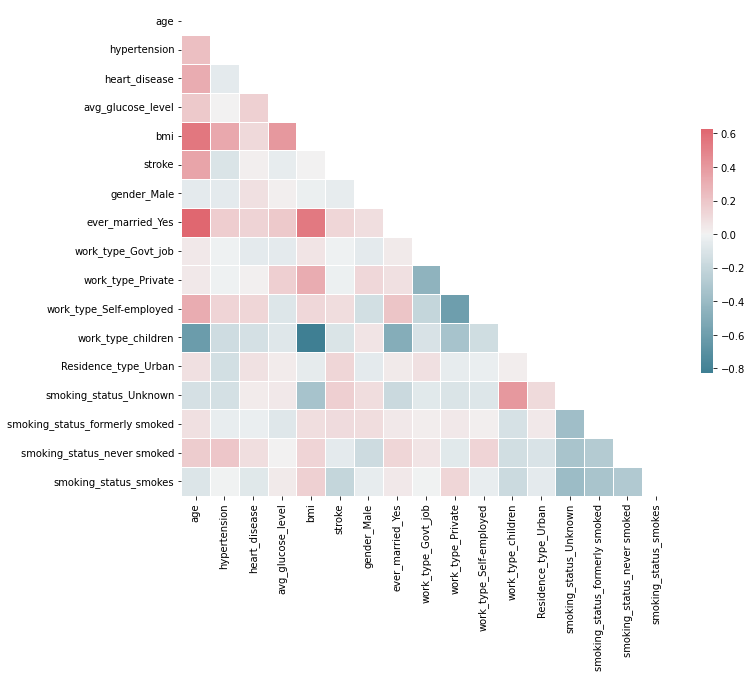

In [8]:
# heatmap
corr = df.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Build training and test datasets
x = df.drop(['stroke'], axis=1)
y = df['stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [10]:
# Load libraries
from sklearn.linear_model import LogisticRegression

# Setup an instance of the model
lr = LogisticRegression()

# Fit the model lr
lr.fit(x_train, y_train)

C:\Users\jahed\anaconda3\envs\mainone\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
# Build predictions lr
lr_pred = lr.predict(x_test)

# Calculate accuracy score lr
accuracy_score(y_test, lr_pred)

0.8524590163934426

(Text(33.0, 0.5, 'Actual Value'), Text(0.5, 15.0, 'Predicted Value'))

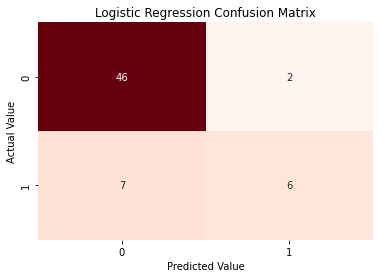

In [12]:
# Build a confusion matrix of the results lr
lr_matrix = confusion_matrix(y_test, lr_pred)

# Create pandas df lr
lr_cm = pd.DataFrame(lr_matrix)

# Create heatmap lr
ax= plt.subplot()
sns.heatmap(lr_cm, annot=True, cbar=None, cmap='Reds', ax=ax)
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('Actual Value'), ax.set_xlabel('Predicted Value')

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
# Build predictions dtc
dtc_pred = dtc.predict(x_test)

# Calculate accuracy score dtc
accuracy_score(y_test, dtc_pred)

0.7049180327868853

(Text(33.0, 0.5, 'Actual Value'), Text(0.5, 15.0, 'Predicted Value'))

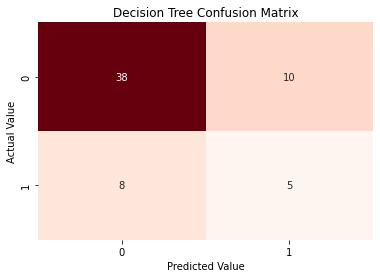

In [15]:
# Build a confusion matrix of the results dtc
dtc_matrix = confusion_matrix(y_test, dtc_pred)

# Create pandas df dtc
dtc_cm = pd.DataFrame(dtc_matrix)

# Create heatmap dtc
ax= plt.subplot()
sns.heatmap(dtc_cm, annot=True, cbar=None, cmap='Reds', ax=ax)
ax.set_title('Decision Tree Confusion Matrix')
ax.set_ylabel('Actual Value'), ax.set_xlabel('Predicted Value')

In [16]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

# Fit the model rfc
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
# Build predictions rfc
rfc_pred = rfc.predict(x_test)

# Calculate accuracy score rfc
accuracy_score(y_test, rfc_pred)

0.7704918032786885

(Text(33.0, 0.5, 'Actual Value'), Text(0.5, 15.0, 'Predicted Value'))

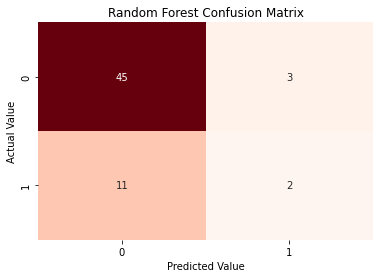

In [18]:
# Build a confusion matrix of the results rfc
rfc_matrix = confusion_matrix(y_test, rfc_pred)

# Create pandas df rfc
rfc_cm = pd.DataFrame(rfc_matrix)

# Create heatmap rfc
ax= plt.subplot()
sns.heatmap(rfc_cm, annot=True, cbar=None, cmap='Reds', ax=ax)
ax.set_title('Random Forest Confusion Matrix')
ax.set_ylabel('Actual Value'), ax.set_xlabel('Predicted Value')